In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [73]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
target = df.total_claim_amount   # extract target variabel from dataframe
# drop target variable (total_claim_amount) and effective_to_date for encoding
df = df.drop(["effective_to_date","total_claim_amount"],axis=1) 
df

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      month employment_status gender  income location_code  ...  \
0       feb          employed      m   48029      suburban  ...   
1       jan        unemployed      f   92260      suburban  ...   
2       feb          employed      m   22139      suburban  ...   
3       jan          employed      m   49078      suburban  ...   
4       jan     medical leave      f   23675      suburban  ...   
...     ...               ...    ...     ...           ...  ...   
10684   jan        unemployed      f   61541      suburban  ...   
10685   jan          employed      f   61146         urban  ...   
10686   feb          employed      f   39837         rural  ...   
10687   feb          employed      f   64195         urban  ...   
10688   jan        unemployed      m   68942      suburban  ...   

      months_since_last_claim  months_since_policy_inception  \
0                           7                             52   
1                           3                             26   
2                          34                             31   
3                          10                              3   
4                          33                             31   
...                       ...                            ...   
10684                      12                             40   
10685                       7                             68   
10686                      11                             63   
10687                       0                             27   
10688                      31                              1   

       number_of_open_complaints  number_of_policies     policy_type  \
0                              0                   9  corporate auto   
1                              0                   1   personal auto   
2                              0                   2   personal auto   
3                              0                   2  corporate auto   
4                              0                   7   personal auto   
...                          ...                 ...             ...   
10684                          0                   7   personal auto   
10685                          0                   6   personal auto   
10686                          0                   2  corporate auto   
10687                          4                   6   personal auto   
10688                          0                   3   personal auto   

             policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0      corporate l3           offer3         agent  four-door car      medsize  
1       personal l3           offer4   call center  four-door car      medsize  
2       personal l3           offer3   call center            suv      medsize  
3      corporate l3           offer2        branch  four-door car      medsize  
4       personal l2           offer1        branch  four-door car      medsize  
...             ...              ...           ...            ...          ...  
10684   personal l1           offer3           web     luxury car      medsize  
10685   pers

### Check for multicollinearity and drop highly correlated features

#### Heatmap

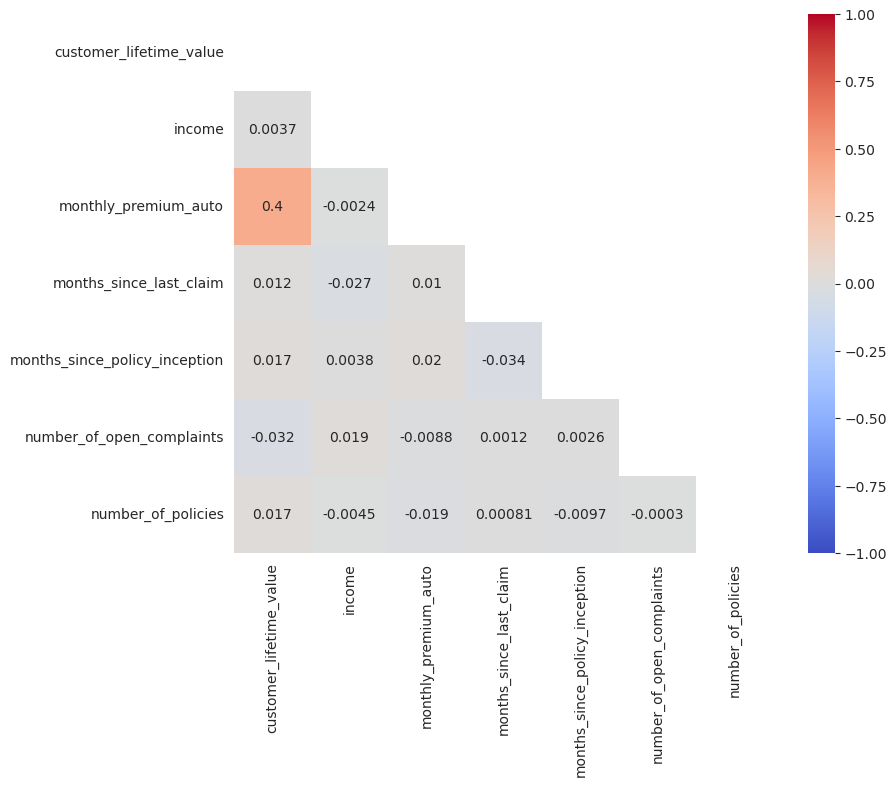

In [74]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

----> No highly correlated (>0.8) features, no need to drop columns

### One-hot encoding

In [75]:
cats = df.select_dtypes(include="object")   # categorical data

In [86]:
#enc = OneHotEncoder()
cats_hotcoded = pd.get_dummies(cats, drop_first=True)
cats_hotcoded

region_east  region_north west  region_west region  response_yes  \
0                0                  0                   0             0   
1                0                  0                   1             0   
2                1                  0                   0             0   
3                0                  1                   0             1   
4                0                  1                   0             0   
...            ...                ...                 ...           ...   
10684            0                  0                   0             0   
10685            0                  1                   0             0   
10686            0                  0                   0             0   
10687            0                  0                   1             0   
10688            0                  0                   0             0   

       coverage_extended  coverage_premium  education_college  \
0                      0                 0                  1   
1                      0                 0                  1   
2                      0                 0                  0   
3                      1                 0                  1   
4                      0                 1                  0   
...                  ...               ...                ...   
10684                  0                 1                  0   
10685                  0                 0                  1   
10686                  1                 0                  0   
10687                  0                 1                  1   
10688                  0                 0                  0   

       education_doctor  education_high school or below  education_master  \
0                     0                               0                 0   
1                     0                               0                 0   
2                     0                               0                 0   
3                     0                               0                 0   
4                     0                               0                 0   
...                 ...                             ...               ...   
10684                 0                               0                 0   
10685                 0                               0                 0   
10686                 0                               0                 0   
10687                 0                               0                 0   
10688                 0                               0                 0   

       ...  sales_channel_branch  sales_channel_call center  \
0      ...                     0                          0   
1      ...                     0                          1   
2      ...                     0                          1   
3      ...                     1                          0   
4      ...                     1                          0   
...    ...                   ...                        ...   
10684  ...                     0                          0   
10685  ...                     1                          0   
10686  ...                     0                          0   
10687  ...                     1                          0   
10688  ...                     0                          0   

       sales_channel_web  vehicle_class_luxury car  vehicle_class_luxury suv  \
0                      0                         0                         0   
1                      0                         0                         0   
2                      0                         0                         0   
3                      0                         0                         0   
4                      0                         0                         0   
...                  ...                       ...                       ...   
10684                  1                         1                         0   
106

### Label encoding

In [85]:
# this part still needs to be finalized

In [76]:
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'month', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [56]:
df.months_since_last_claim.unique()

array([ 7,  3, 34, 10, 33,  2,  8, 35, 19, 13,  5, 24, 25,  6, 20, 26, 14,
        9, 29, 11,  1, 18, 16, 30, 12,  4, 22, 31, 21, 28, 17, 15, 32, 23,
       27,  0])

In [ ]:
label_encode_list = ["region", "response", "coverage", "education", "month", "employment_status", "gender",
                     "location_code", "marital_status",  "policy_type", "renew_offer_type", "sales_channel", "vehicle_class", 
                     "vehicle_size", 

In [ ]:
def label_encoding(x):
    df[x] = le.fit_transform(df[x])
    return df

for i in list_label_categoricals:
    label_encoding(i)
    
categorical[label_encode_list] = categorical[label_encode_list].apply(le.fit_transform)

In [ ]:
reshape
scaler = MinMaxScaler()
months_scaled = scaler.fit_transform()